In [1]:
import numpy as np

帮助文档:
1. 使用问号 : np?
2. 使用 help 函数 : help(np)

magic function :

+ %run 运行自己的脚本
+ %timeit 测试速度
+ %time

In [21]:
A = np.array([[1, 2, 3],
              [4, 5, 6]])
a = np.array([1, 2, 3])
b = np.array(1)
A.shape, a.shape, b.shape

((2, 3), (3,), ())

`np.concatenate` 只能处理两个矩阵 dimensions 相同的情况, 如果连接一个矩阵和一个向量是会报错的, 比如 A 的 shape 为 (2, 3), 而向量 a 的 shape 为 (3,), 它们俩的维度不同, 所以 `np.concatenate([A, a], axis=0)` 会报错. 解决方法: 
1. 将 a reshape 为 (1, 3)
2. 使用 vstack

In [23]:
np.concatenate([a, a], axis=0).shape, np.concatenate([A, A], axis=1).shape

((6,), (2, 6))

In [26]:
np.vstack([A, a]).shape, np.hstack([a, a, a]).shape

((3, 3), (9,))

In [28]:
x = np.arange(0, 20, 2)
np.split(x, [3, 7])

[array([0, 2, 4]), array([ 6,  8, 10, 12]), array([14, 16, 18])]

In [29]:
np.split(x, [-1])

[array([ 0,  2,  4,  6,  8, 10, 12, 14, 16]), array([18])]

In [31]:
%%time
B = np.arange(1000000)
L = np.array(2*e for e in B)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.82 ms


In [34]:
A // 2, A.dtype

(array([[0, 1, 1],
        [2, 2, 3]]), dtype('int64'))

In [35]:
B = np.arange(6).reshape(3, 2)

In [38]:
A.dot(B).shape, (A * B.T).shape

((2, 2), (2, 3))

In [39]:
A * a

array([[ 1,  4,  9],
       [ 4, 10, 18]])

In [40]:
A + a

array([[2, 4, 6],
       [5, 7, 9]])

In [41]:
a.shape

(3,)

In [42]:
a + A

array([[2, 4, 6],
       [5, 7, 9]])

In [43]:
np.vstack([a] * A.shape[0]) + A

array([[2, 4, 6],
       [5, 7, 9]])

In [45]:
np.tile(a, [2, 1]) # 2 表示在行向量上堆叠两次, 1 表示在列向量上堆叠 1 次, tile : 瓷砖, 瓦片

array([[1, 2, 3],
       [1, 2, 3]])

### 矩阵的逆

In [46]:
A = np.arange(4).reshape(2, 2)

In [48]:
invA = np.linalg.inv(A)

In [49]:
A.dot(invA)

array([[ 1.,  0.],
       [ 0.,  1.]])

### 聚合操作

In [50]:
L = np.random.random(100)

In [51]:
sum(L)

51.823497816214903

In [52]:
np.sum(L)

51.823497816214925

In [54]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

10 loops, best of 3: 67.7 ms per loop
1000 loops, best of 3: 361 µs per loop


In [55]:
np.min(big_array), np.max(big_array)

(4.5408023374715611e-07, 0.99999891406379637)

In [58]:
X = np.arange(9).reshape(3, 3)
print(np.sum(X))
np.sum(X, axis=0)

36


array([ 9, 12, 15])

In [59]:
np.prod(X)

0

In [60]:
np.mean(X), np.median(X)

(4.0, 4.0)

In [61]:
np.percentile(X, q=50) # X 中 50% 的数是小于 4.0 的, 当 q 为 50 时, 就是求中位数, q 为 100 时, 就是求最大值

4.0

In [62]:
np.var(big_array) # 求方差

0.083333659952458547

In [65]:
np.std(big_array) # 标准差

0.28867570031517814

In [68]:
x = np.random.normal(loc=0, scale=1, size=1000000) # 正态分布
np.mean(x), np.std(x)

(-0.00083919559704020356, 0.99954729199597636)

### 索引

In [69]:
A

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [73]:
np.max(A)

8

In [74]:
np.argmax(A) # 求出最大值的索引

8

### 排序和使用索引

In [75]:
x = np.arange(16)
np.random.shuffle(x)
x

array([12,  5, 13,  6, 11,  0,  7,  2, 15,  8,  4, 10,  3, 14,  9,  1])

In [76]:
np.sort(x)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [77]:
x

array([12,  5, 13,  6, 11,  0,  7,  2, 15,  8,  4, 10,  3, 14,  9,  1])

In [79]:
x.sort()
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

也可以对二维的矩阵进行排序, 这里就不演示了. 注意 np.sort 算法还带有 axis 参数.

In [81]:
np.random.shuffle(x)
print(x)
np.argsort(x) # 返回排序后 x 的索引

[13  2  3 11  6  1 14 10  0  4 12  5 15  8  7  9]


array([ 8,  5,  1,  2,  9, 11,  4, 14, 13, 15,  7,  3, 10,  0,  6, 12])

In [82]:
np.partition(x, 3) # 快速排序的 partition 操作, 3为标定点, 小于 3 的元素放在 3 前面, 大于 3 的元素放在 3 后面.

array([ 0,  1,  2,  3,  4,  5,  8,  9,  7,  6, 10, 12, 15, 14, 11, 13])

In [83]:
np.argpartition(x, 3)

array([ 8,  5,  1,  2,  9, 11, 13, 15, 14,  4,  7, 10, 12,  6,  3,  0])

In [91]:
X = np.random.randint(10, size=(4, 4))
X

array([[1, 5, 4, 9],
       [8, 5, 6, 3],
       [3, 5, 2, 5],
       [8, 1, 9, 9]])

In [92]:
np.argsort(X, axis=1) # 返回排序后的索引, 按行排序

array([[0, 2, 1, 3],
       [3, 1, 2, 0],
       [2, 0, 1, 3],
       [1, 0, 2, 3]])

### Fancing Index

In [94]:
ind = [3, 5, 9]
x[ind]

array([11,  1,  4])

In [95]:
ind = np.array([
    [0, 2],
    [1, 3]
])
x[ind] # 此时 x 竟然是二维的

array([[13,  3],
       [ 2, 11]])

In [98]:
rows = np.array([0, 2, 3])
cols = np.array([1, 3, 2])
X[rows, cols]

array([5, 5, 9])

np.array 的比较

In [99]:
x < 3

array([False,  True, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False], dtype=bool)

In [100]:
np.count_nonzero(x <= 3)

4

In [102]:
np.any(x == 0), np.any(x < 0)

(True, False)

In [103]:
np.all(x >= 0), np.all(x > 0)

(True, False)

In [104]:
np.sum(x % 2 == 0) # 偶数的个数

8

In [107]:
X = np.arange(16).reshape(4, 4)
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [108]:
np.sum(X % 2 == 0, axis = 0) # 每一列的偶数个数, axis=0 表示沿着第 0 轴

array([4, 0, 4, 0])

In [109]:
np.sum(X % 2 == 0, axis=1)

array([2, 2, 2, 2])

In [110]:
x

array([13,  2,  3, 11,  6,  1, 14, 10,  0,  4, 12,  5, 15,  8,  7,  9])

In [111]:
# 现在要求 x > 3 并且小于 10 的元素个数
# 如果写成下面这样就会报错, 因为 (x > 3) 以及 (x < 10) 返回的结果
# 都是含 bool 值的 array, 对两个 array 求 and 当然是有问题的.
np.sum((x > 3) and (x < 10))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [113]:
# 下面是正确的写法, 使用 & 位运算符, 因为布尔值就相当于二进制的数
np.sum((x > 3) & (x < 10))

6

In [114]:
np.sum((x % 2 == 0) | (x > 10))

11

In [115]:
np.sum(~(x == 0)) # x 中不等于 0 的数

15

In [116]:
x[x < 5]

array([2, 3, 1, 0, 4])

In [119]:
X[X[:, -1] % 3 == 0, :]

array([[ 0,  1,  2,  3],
       [12, 13, 14, 15]])

### matplotlib 基础

In [123]:
%matplotlib inline

In [124]:
import matplotlib.pyplot as plt

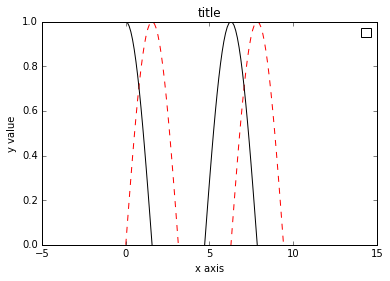

In [135]:
x = np.linspace(0, 10, 100)
siny = np.sin(x)
cosy = np.cos(x)
## 使用 plt.axis 替代 lim
#plt.xlim(-5, 15)
#plt.ylim(0, 1)
plt.title("title")
plt.axis([-5, 15, 0, 1])
plt.xlabel("x axis")
plt.ylabel("y value")
plt.legend(["sin(x)", "cos(x)"])
plt.plot(x, siny, 'r--', x, cosy, 'k')

### scatter plot

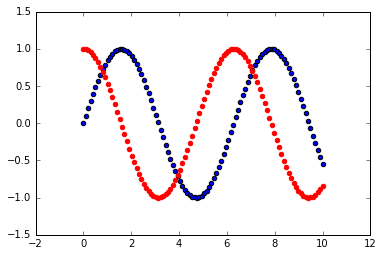

In [136]:
plt.scatter(x, siny)
plt.scatter(x, cosy, color="red")

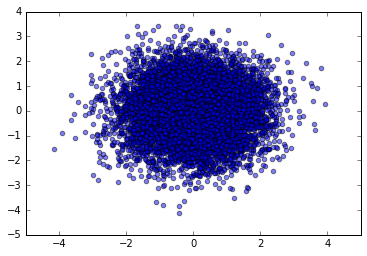

In [138]:
x = np.random.normal(0, 1, 10000)
y = np.random.normal(0, 1, 10000)
plt.scatter(x, y, alpha=0.5)

### 读取数据和简单的数据探索

In [139]:
from sklearn import datasets

In [140]:
iris = datasets.load_iris()

In [141]:
iris.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [142]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='|S10')

In [146]:
X = iris.data[:, :2]
y = iris.target
X.shape

(150, 2)

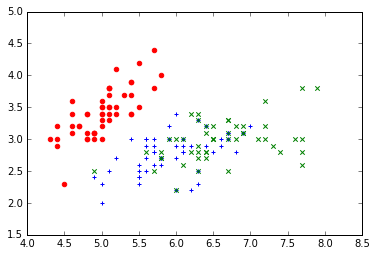

In [148]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='o')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='+')
plt.scatter(X[y == 2, 0], X[y == 2, 1], color='green', marker='x')

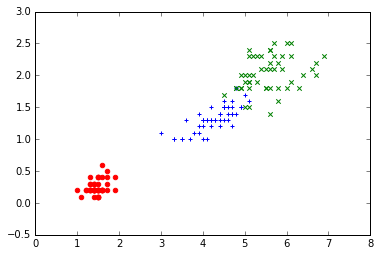

In [149]:
X = iris.data[:, 2:]
y = iris.target
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', marker='o')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='+')
plt.scatter(X[y == 2, 0], X[y == 2, 1], color='green', marker='x')